In [148]:
import pickle, os, sys
import numpy as np

# reloading functions without runtime.restart
import importlib
importlib.reload(cls_data)

<module 'cls_data' from './classes/cls_data.py'>

In [149]:
sys.path.insert(0, "./classes/")
import cls_data

data_manager = cls_data.DataManager(init_data=False)

In [150]:
with open(os.path.join('../data/tmp_pckl/', 'data_manager_for_swk.pkl'), 'rb') as dm_pkl:
    data_manager.data_btc = pickle.load(dm_pkl)

In [151]:
cols = data_manager.data_btc[data_manager.data_btc.columns.difference(['Price'])].columns
cols

Index(['AVBLS', 'BTC_MINED_PDAY', 'CPTRA', 'Growth', 'HRATE', 'High', 'Low',
       'MIREV', 'MKTCP', 'MWNTD', 'MWNUS', 'MWTRV', 'NTRAT', 'Open', 'TOTBC',
       'TOUTV', 'TRFEE', 'TRVOU', 'VOL_CHANGE_PDAY', 'Vol'],
      dtype='object')

./classes/cls_data.py:471: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # cann't send with kwargs as x is a positional arg of ax.hist()


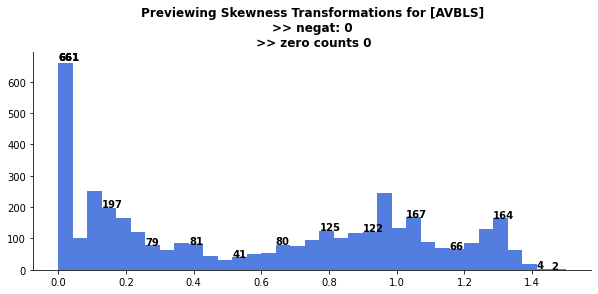

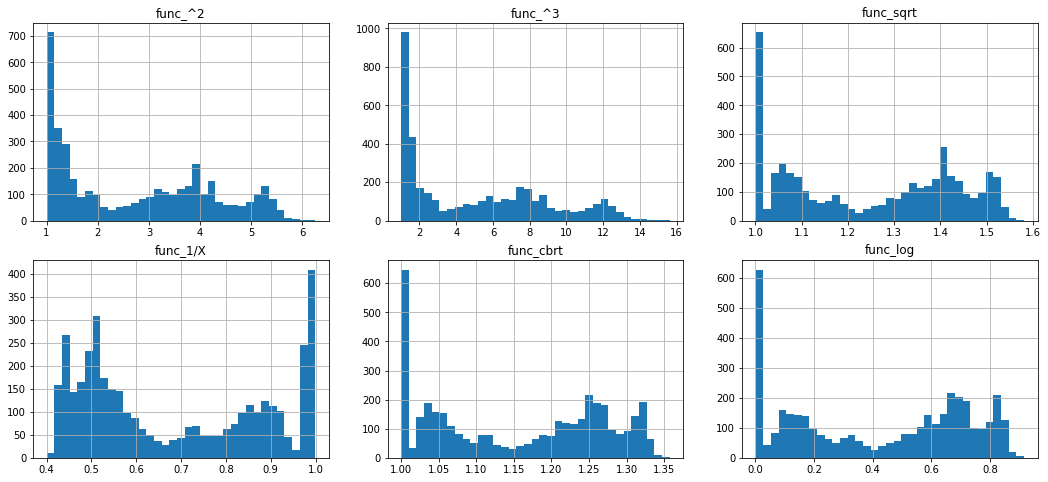

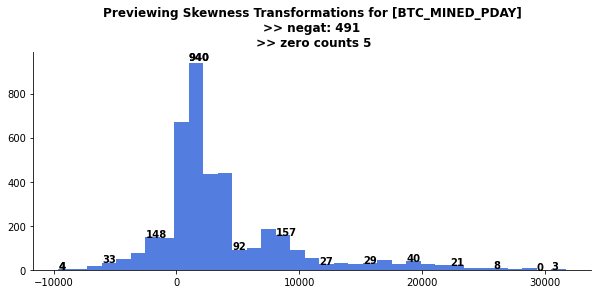

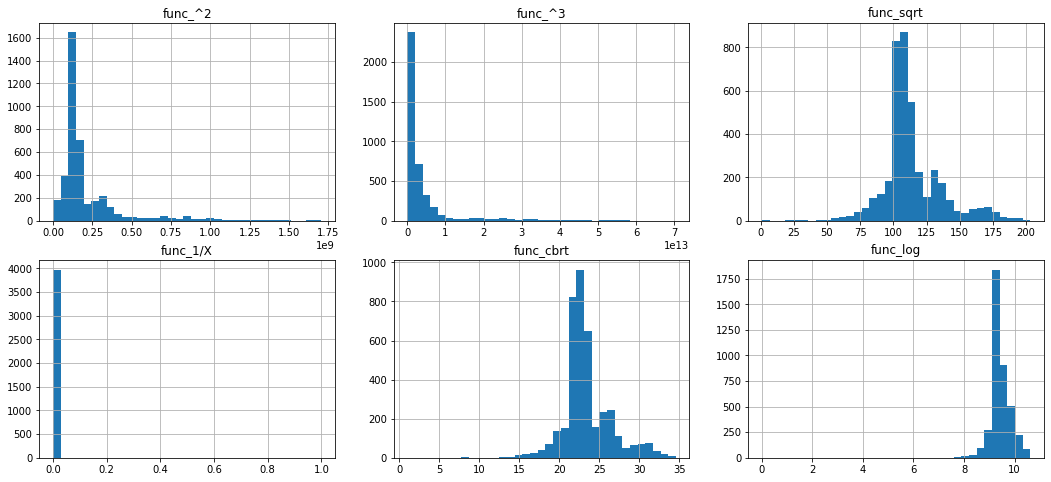

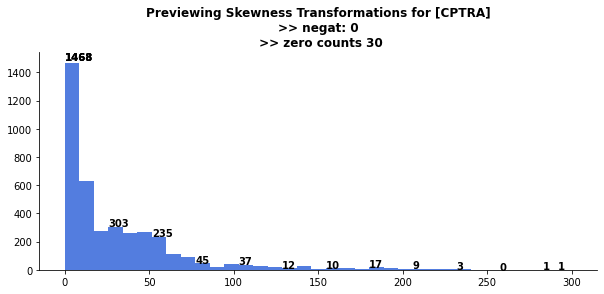

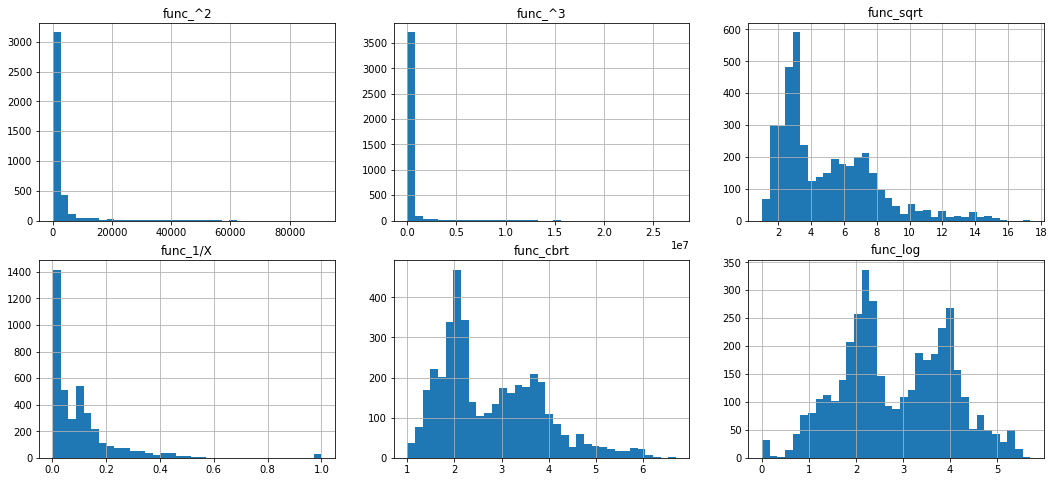

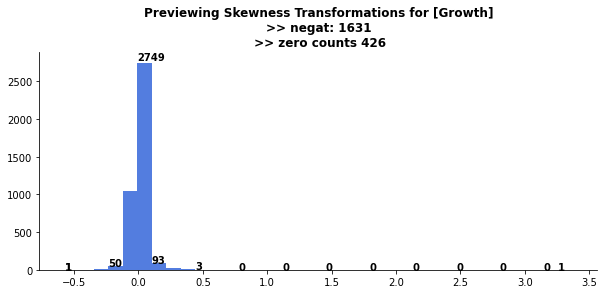

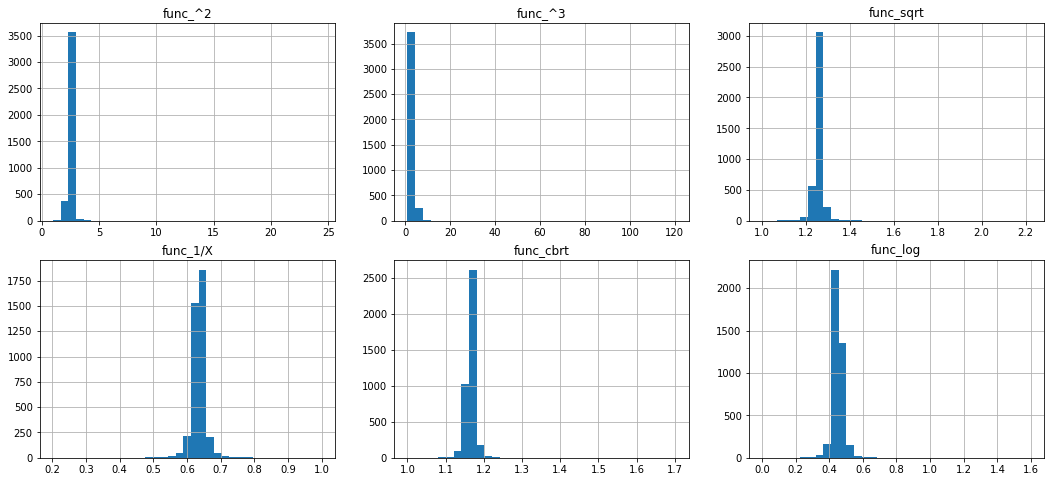

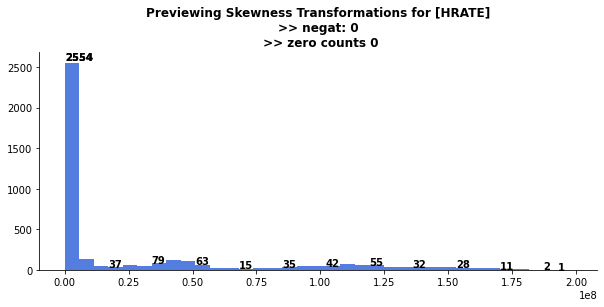

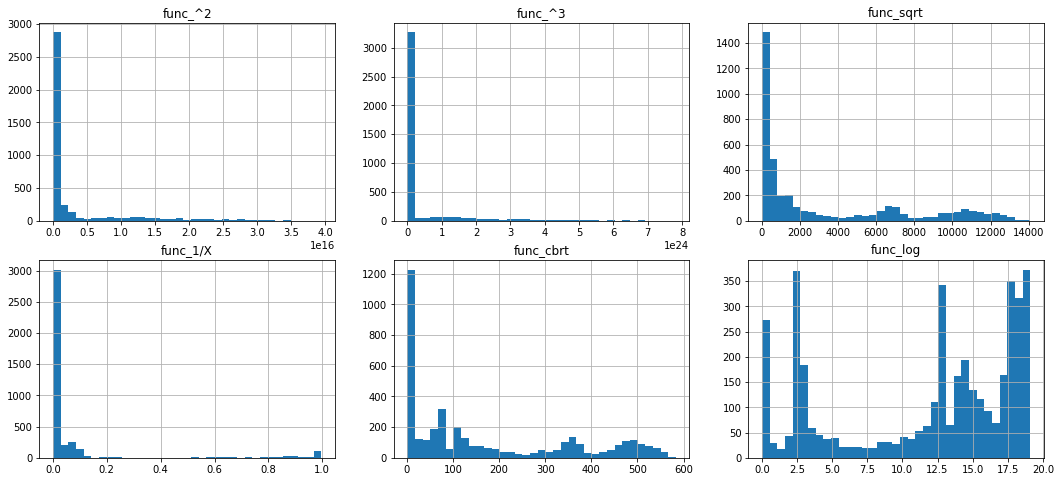

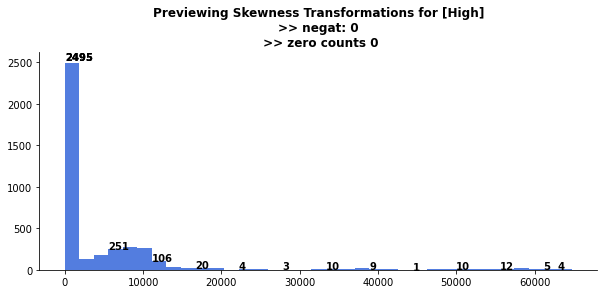

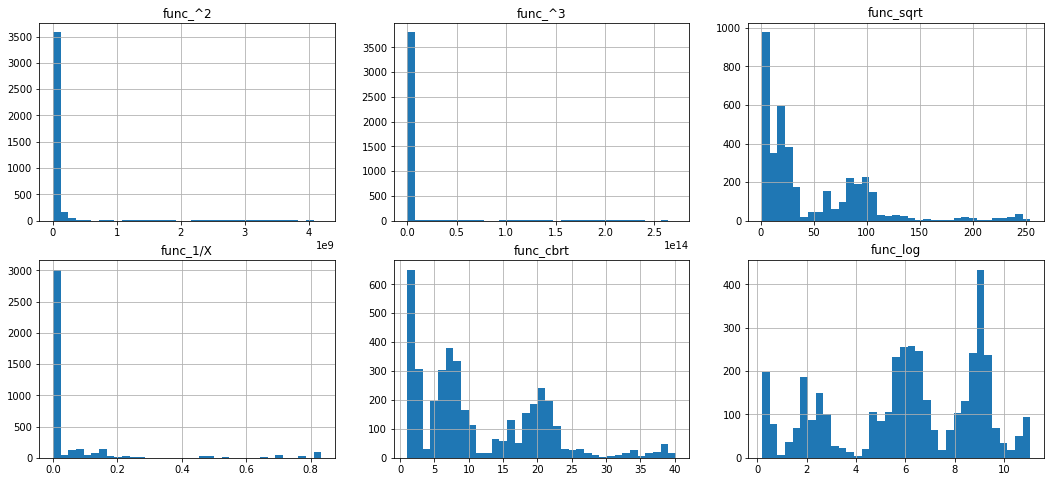

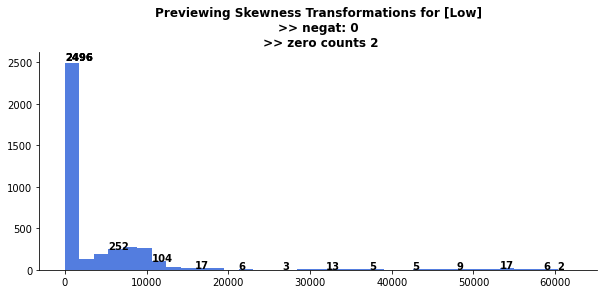

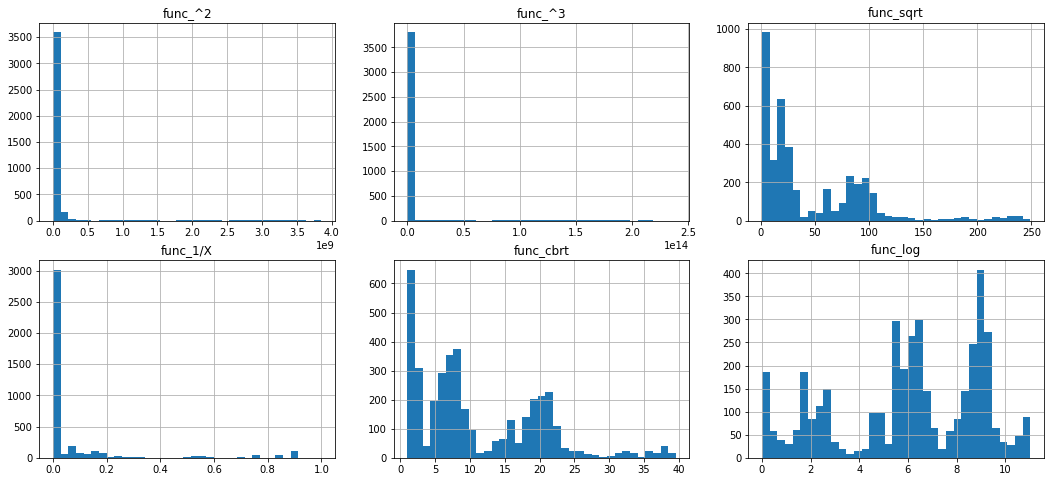

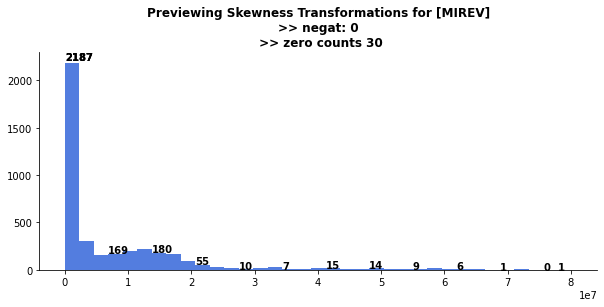

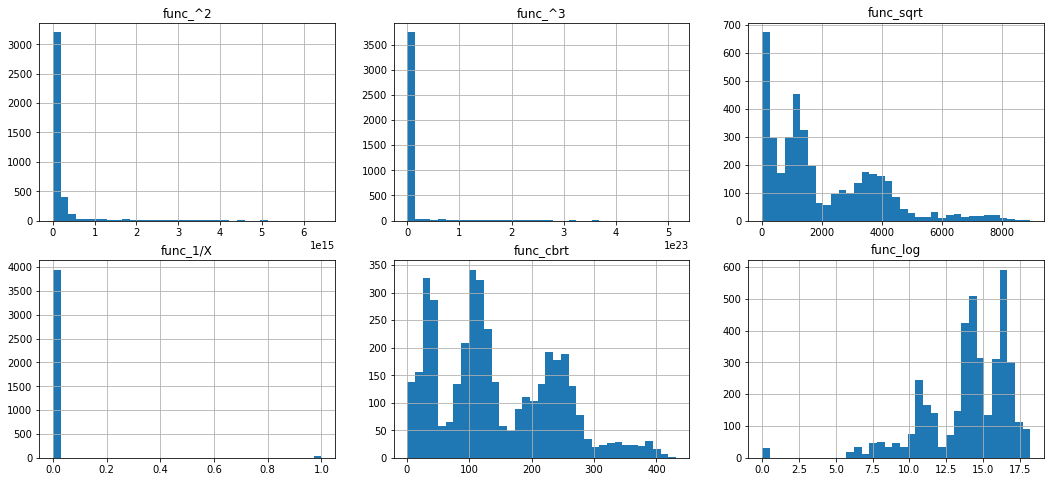

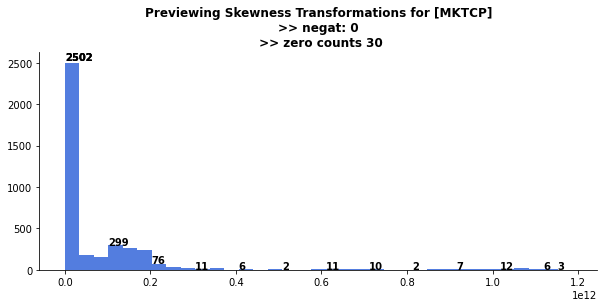

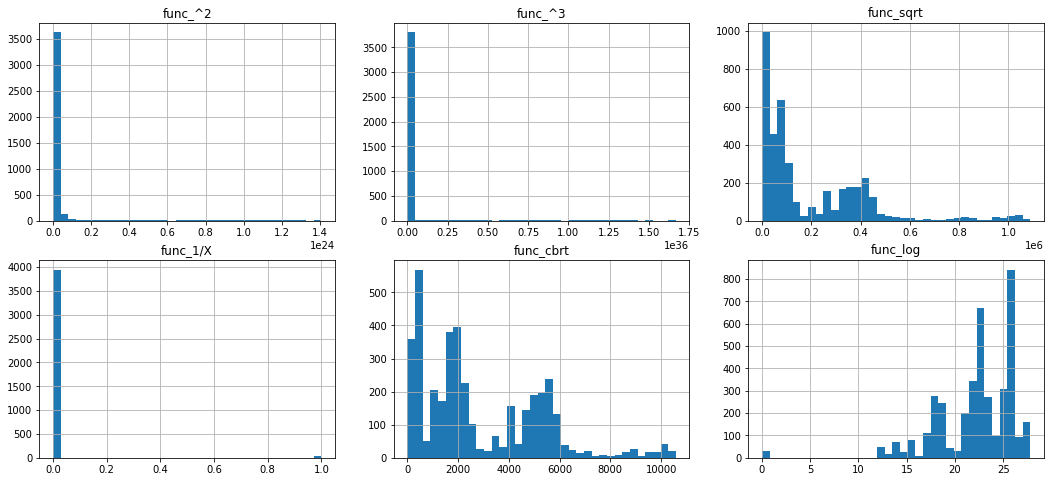

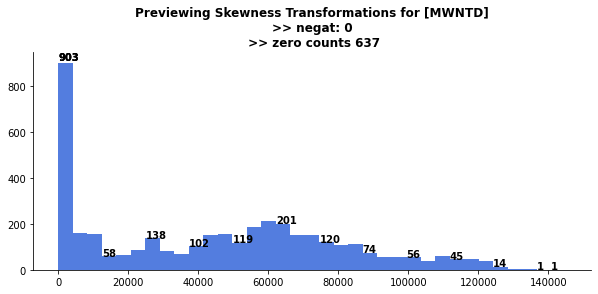

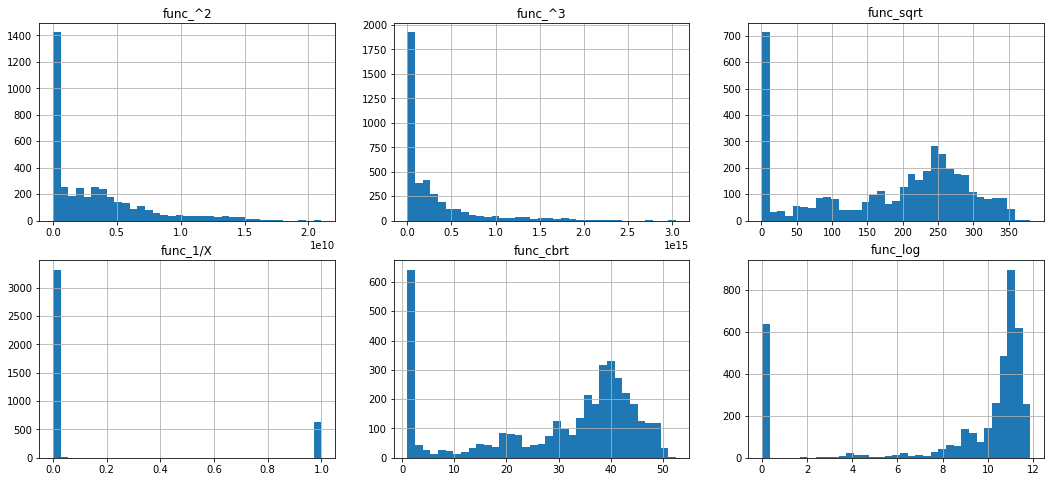

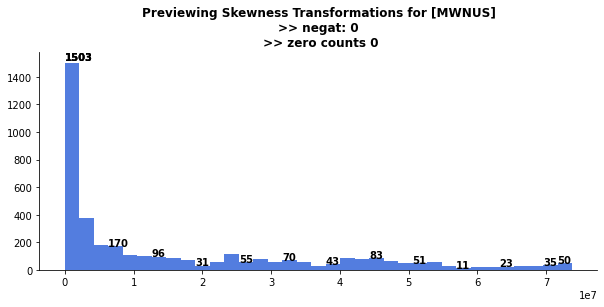

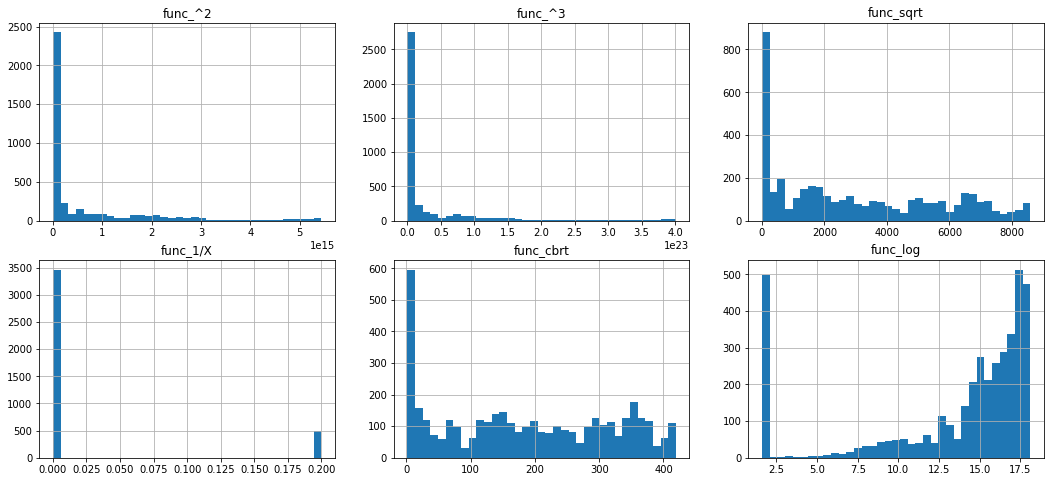

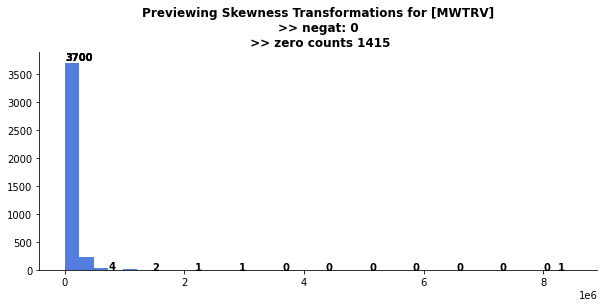

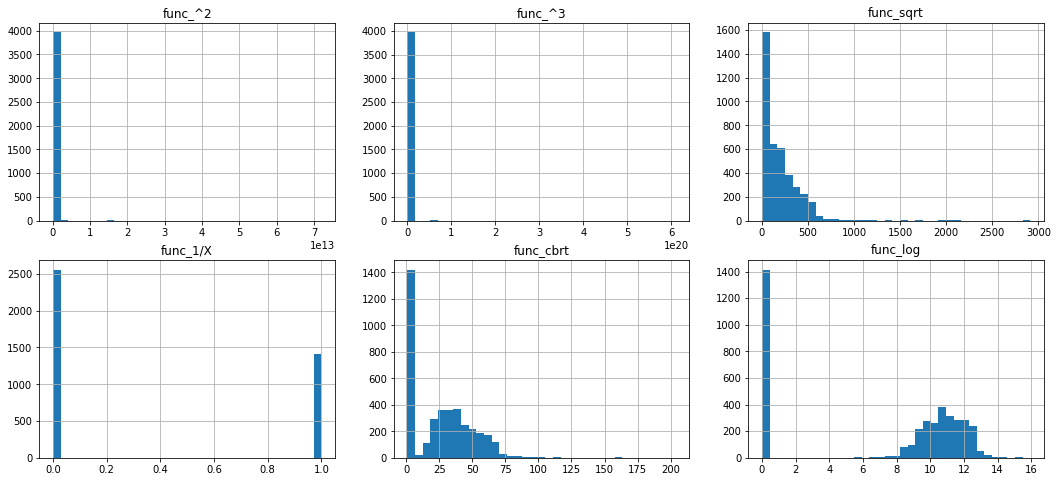

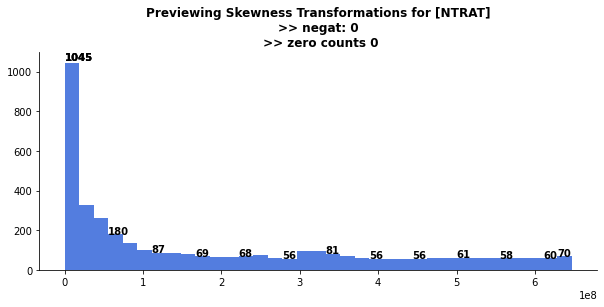

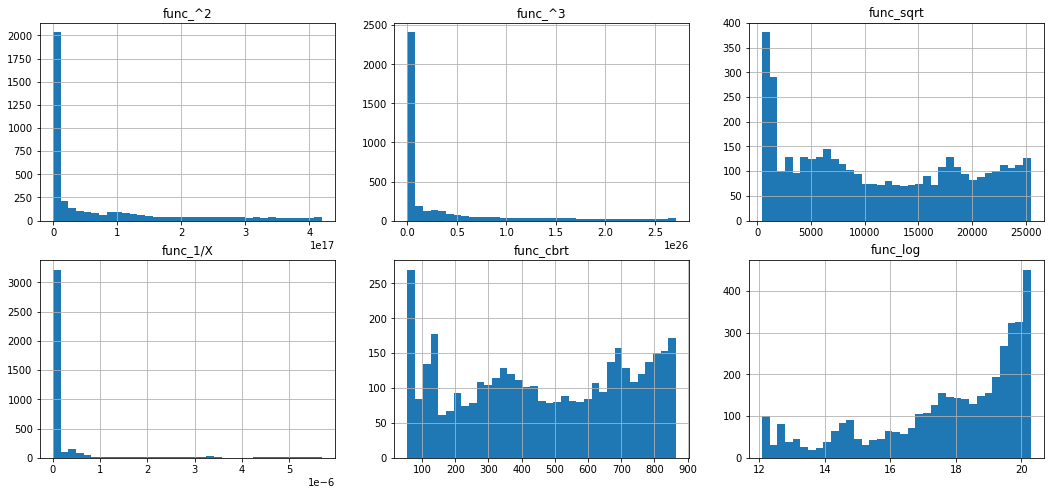

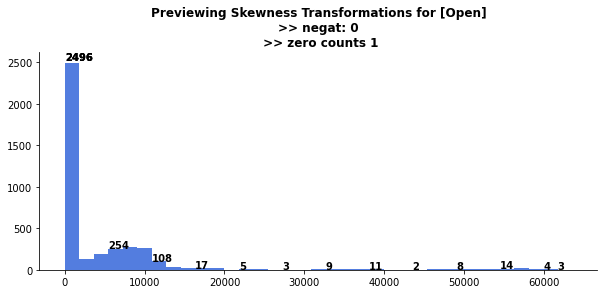

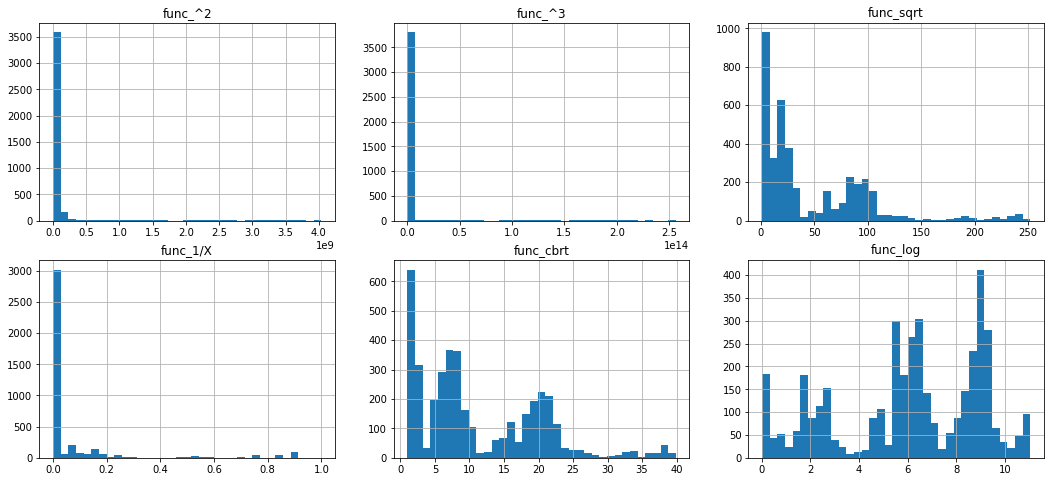

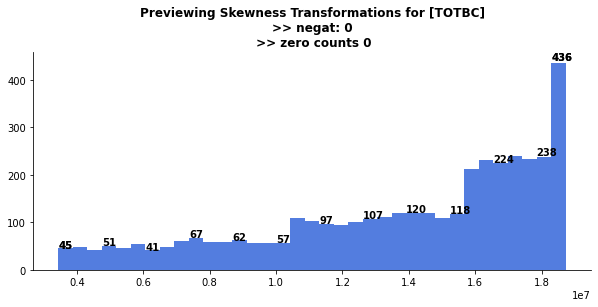

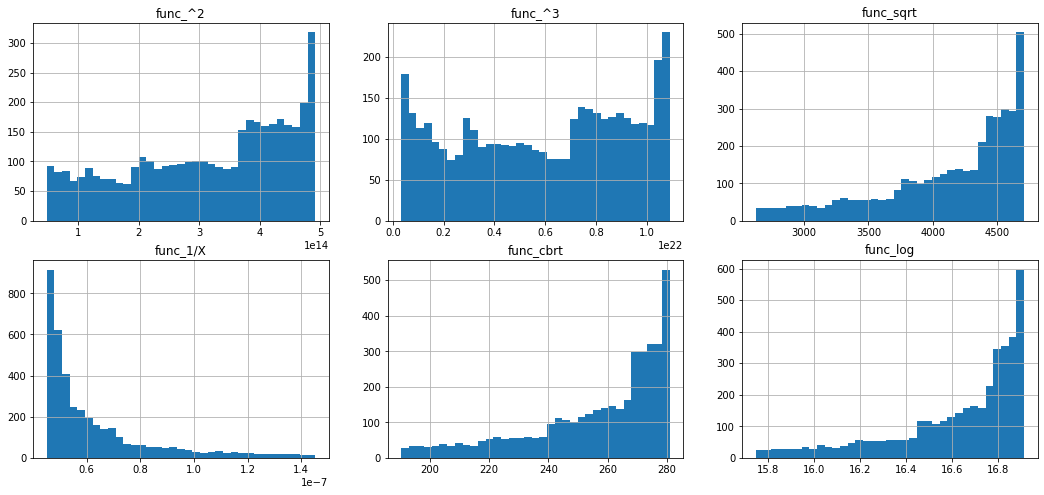

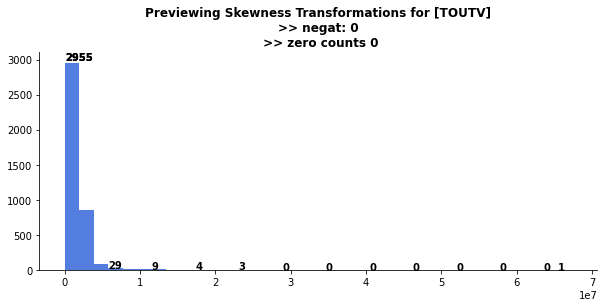

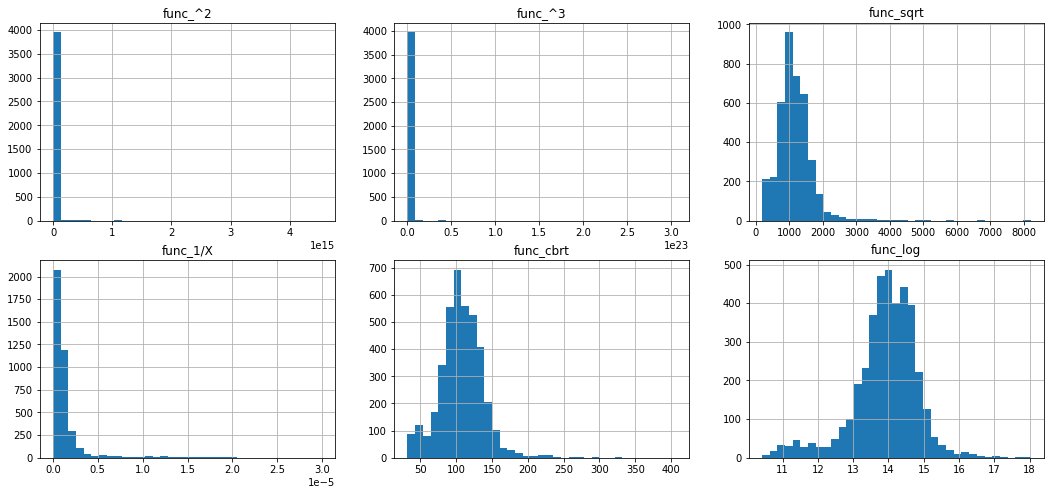

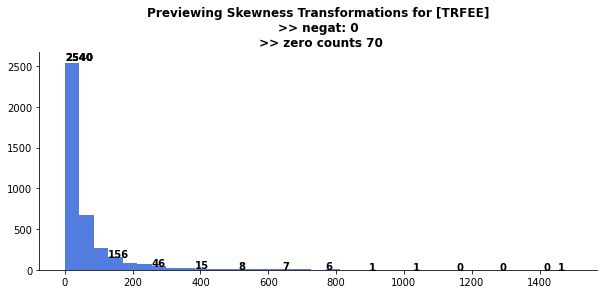

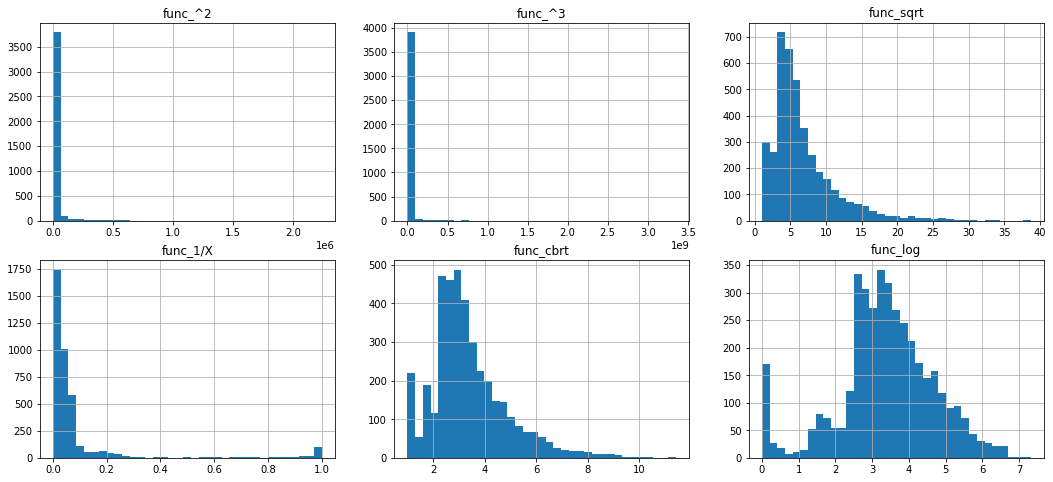

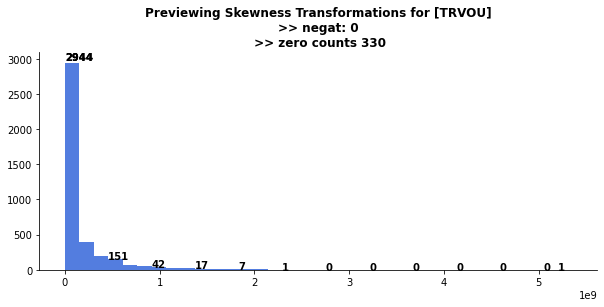

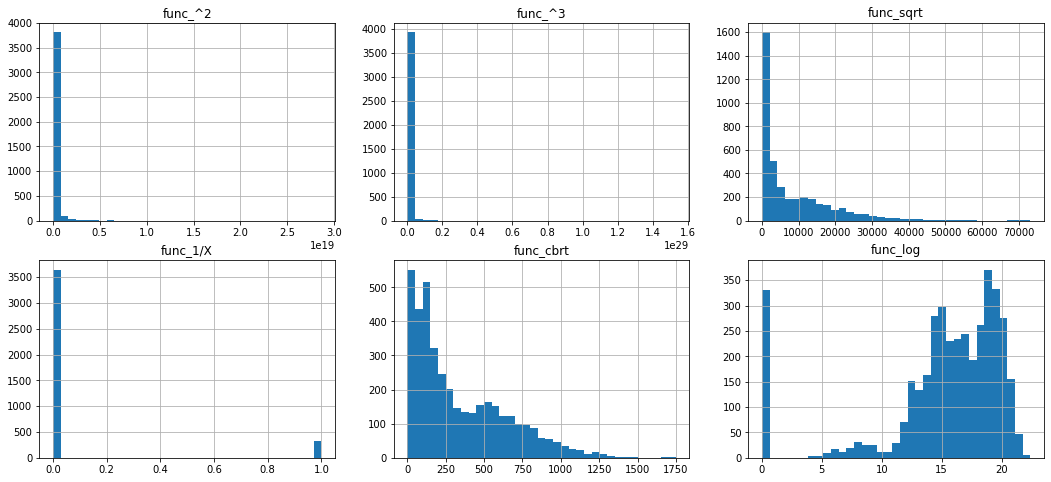

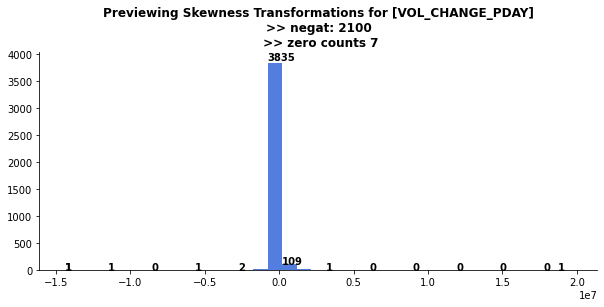

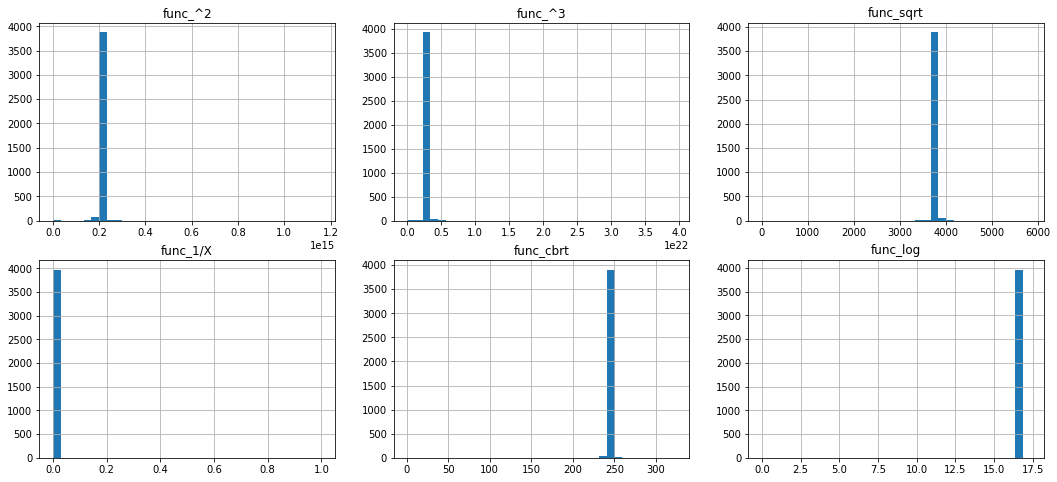

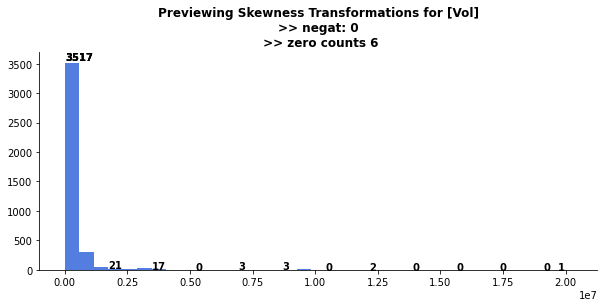

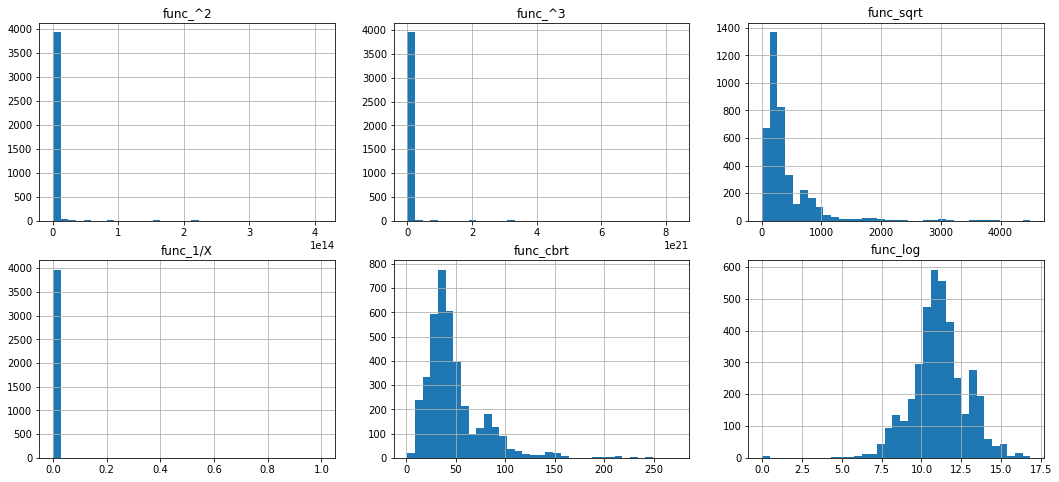

In [152]:
func_arr = [
    ('func_^2', lambda X: np.power(X.values, 2)),
    ('func_^3', lambda X: np.power(X.values, 3)),
    ('func_sqrt', lambda X: np.sqrt(X.values)),
#   ('func_sqrt_zer_log', lambda X: np.ma.log(np.sqrt(X.values)).filled(0)),
    ('func_1/X', lambda X: 1/X),
    ('func_cbrt',lambda X: np.cbrt(X.values)),
    ('func_log', lambda X: np.log(X.values)),
#     ('func_log_1/X', lambda X: 1 / np.log(X.values))
#   ('func_zer_log',lambda X: np.ma.log(X.values).filled(0))
           ]

for col in cols:
    data_manager.features_plt_transformations(feat_name=col, func_arr=func_arr, bins=35, corr_to_pos=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: overflow encountered in exp2
  import sys


ValueError: supplied range of [1.0, inf] is not finite

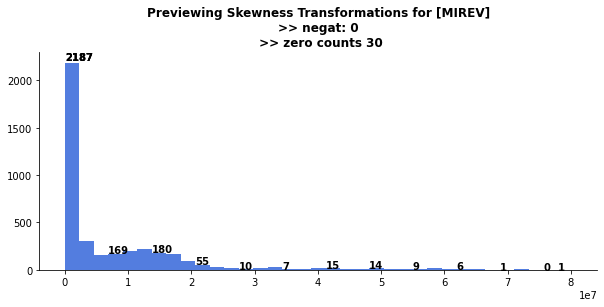

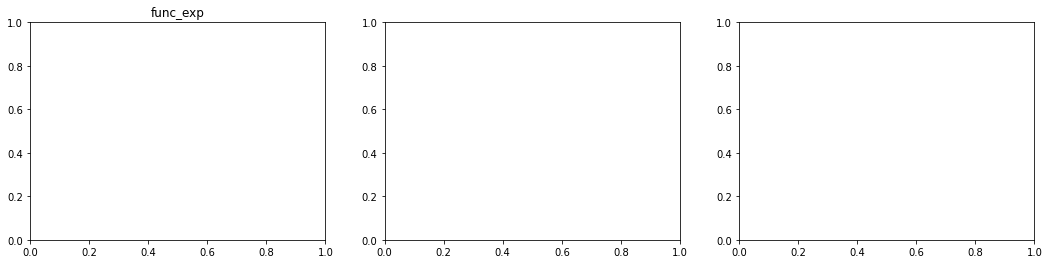

In [153]:
func_arr = [
#     ('func_^2', lambda X: np.power(X.values, 2)),
#     ('func_^3', lambda X: np.power(X.values, 3)),
#     ('func_sqrt', lambda X: np.sqrt(X.values)),
#     ('func_1/X', lambda X: 1/X),
#     ('func_cbrt',lambda X: np.cbrt(X.values)),
    ('func_exp', lambda X: np.exp2(X.values)),
#     ('func_log', lambda X: np.log(X.values)),
           ]

data_manager.features_plt_transformations(feat_name='MIREV', func_arr=func_arr, bins=35)

In [ ]:
np.isfinite(data_manager.data_btc['MIREV'].values).sum()

In [ ]:
data_manager.data_btc['MIREV'].shape[0]

In [154]:
ser = data_manager.data_btc['MIREV']
np.exp(ser)

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:726: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


Date
2021-06-06    inf
2021-06-05    inf
2021-06-04    inf
2021-06-03    inf
2021-06-02    inf
             ... 
2010-07-22    1.0
2010-07-21    1.0
2010-07-20    1.0
2010-07-19    1.0
2010-07-18    1.0
Name: MIREV, Length: 3977, dtype: float64

In [155]:
ser['2021-06-06']

Date
2021-06-06    3.455160e+07
Name: MIREV, dtype: float64